# KNN

The first machine-learning algorithm we’ll look at is k-Nearest Neighbors (kNN). It
works like this: we have an existing set of example data, our training set. We have
labels for all of this data—we know what class each piece of the data should fall into.
When we’re given a new piece of data without a label, we compare that new piece of
data to the existing data, every piece of existing data. We then take the most similar
pieces of data (the nearest neighbors) and look at their labels. We look at the top k
most similar pieces of data from our known dataset; this is where the k comes from. (k
is an integer and it’s usually less than 20.) Lastly, we take a majority vote from the k
most similar pieces of data, and the majority is the new class we assign to the data we
were asked to classify

![title](img/knn2.png)
![title](img/knn1.png)

Now that we have all the distances to our unknown movie, we need to find the k-nearest
movies by sorting the distances in decreasing order. Let’s assume k=3. Then, the three
closest movies are He’s Not Really into Dudes, Beautiful Woman, and California Man. The
kNN algorithm says to take the majority vote from these three movies to determine the
class of the mystery movie. Because all three movies are romances, we forecast that the
mystery movie is a romance movie

## Prepare: importing data with Python

In [23]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import os

In [5]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [7]:
group,labels = createDataSet()

In [8]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [9]:
labels

['A', 'A', 'B', 'B']

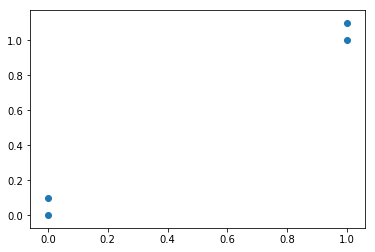

In [15]:
plt.scatter(group[:,0],group[:,1],cmap=labels)

## Putting the kNN classification algorithm into action

### Pseudocode
* For every point in our dataset:
    * calculate the distance between inX and the current point
    * sort the distances in increasing order
    * take k items with lowest distances to inX
    * find the majority class among these items
    * return the majority class as our prediction for the class of inX

In [19]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [21]:
classify0([0,0.1], group, labels, 3)

'B'

### improving matches from a dating site with kNN

In [22]:
def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = np.zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [24]:
datingDataMat,datingLabels = file2matrix(os.path.join('data','datingTestSet.txt'))

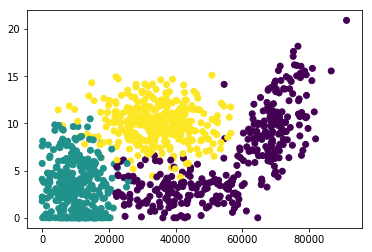

In [33]:
plt.scatter(datingDataMat[:,0], datingDataMat[:,1],c=datingLabels)

####  normalizing numeric values
newValue = (oldValue-min)/(max-min)

In [37]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet/np.tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals

In [38]:
 normMat, ranges, minVals = autoNorm(datingDataMat)

In [49]:
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix(os.path.join('data','datingTestSet2.txt'))       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
#         print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)

In [51]:
datingClassTest()

the total error rate is: 0.066000
33.0


### Example: a handwriting recognition system

In [52]:
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [54]:
testVector = img2vector(os.path.join('data','digits','testDigits','0_13.txt'))

In [65]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = os.listdir(os.path.join('data','digits','trainingDigits'))           #load the training set
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('./data/digits/trainingDigits/%s' % fileNameStr)
    testFileList = os.listdir(os.path.join('data','digits','testDigits'))        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./data/digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 5)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [66]:
handwritingClassTest()

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 7, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 8, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 6, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 5, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 9, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answe